In [43]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = ["TradeData_10_26_2024_11_52_24.csv","TradeData_10_26_2024_11_52_40.csv","TradeData_10_26_2024_11_52_54.csv",
             "TradeData_10_26_2024_11_53_38.csv","TradeData_10_26_2024_11_54_2.csv"]

In [3]:
df = [pd.read_csv(file) for file in file_path]

In [4]:
df

[  typeCode  freqCode  refPeriodId  refYear  refMonth  period reporterCode  \
 C        M  20230101         2023        1    202301     894          ZMB   
 C        M  20230101         2023        1    202301     894          ZMB   
 C        M  20230201         2023        2    202302     894          ZMB   
 C        M  20230201         2023        2    202302     894          ZMB   
 C        M  20230301         2023        3    202303     894          ZMB   
 C        M  20230301         2023        3    202303     894          ZMB   
 C        M  20230401         2023        4    202304     894          ZMB   
 C        M  20230401         2023        4    202304     894          ZMB   
 C        M  20230501         2023        5    202305     894          ZMB   
 C        M  20230501         2023        5    202305     894          ZMB   
 C        M  20230601         2023        6    202306     894          ZMB   
 C        M  20230601         2023        6    202306     894   

In [9]:
combine_df = pd.concat(df,ignore_index=True)

In [11]:
combine_df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,M,20230101,2023,1,202301,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,4207100.689,4207100.689,0,False,True,NaN
1,M,20230101,2023,1,202301,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,4207100.689,4207100.689,0,False,True,NaN
2,M,20230201,2023,2,202302,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,2935730.404,2935730.404,0,False,True,NaN
3,M,20230201,2023,2,202302,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,2935730.404,2935730.404,0,False,True,NaN
4,M,20230301,2023,3,202303,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,5363119.242,5363119.242,0,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,M,20191001,2019,10,201910,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,6962981.448,6962981.448,0,False,True,NaN
121,M,20191101,2019,11,201911,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,5697612.215,5697612.215,0,False,True,NaN
122,M,20191101,2019,11,201911,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,5697612.215,5697612.215,0,False,True,NaN
123,M,20191201,2019,12,201912,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,6070813.624,6070813.624,0,False,True,NaN


In [13]:
combine_df["refYear"]

0       1
1       1
2       2
3       2
4       3
       ..
120    10
121    11
122    11
123    12
124    12
Name: refYear, Length: 125, dtype: int64

In [15]:
row_index = 1
unique_values = set()

In [17]:
for file in file_path:
    df1 = pd.read_csv(file)

    row_unq_values = set(df1.iloc[row_index].unique())
    unique_values.update(row_unq_values)

In [25]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  125 non-null    object 
 1   freqCode                  125 non-null    int64  
 2   refPeriodId               125 non-null    int64  
 3   refYear                   125 non-null    int64  
 4   refMonth                  125 non-null    int64  
 5   period                    125 non-null    int64  
 6   reporterCode              125 non-null    object 
 7   reporterISO               125 non-null    object 
 8   reporterDesc              125 non-null    object 
 9   flowCode                  125 non-null    object 
 10  flowDesc                  125 non-null    int64  
 11  partnerCode               125 non-null    object 
 12  partnerISO                125 non-null    object 
 13  partnerDesc               125 non-null    int64  
 14  partner2Co

In [29]:
combine_df.describe()

,freqCode,refPeriodId,refYear,refMonth,period,flowDesc,partnerDesc,isOriginalClassification,cmdDesc,customsDesc,...,qtyUnitAbbr,isQtyEstimated,altQtyUnitAbbr,isAltQtyEstimated,isNetWgtEstimated,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,isAggregate
count,1.250000e+02,125.000000,125.000000,125.000000,125.0,125.0,125.0,125.000000,125.000000,125.0,...,125.000000,125.000000,1.250000e+02,76.000000,125.0,0.0,1.250000e+02,1.250000e+02,125.0,0.0
mean,2.021170e+07,2021.104000,6.560000,202116.960000,894.0,0.0,0.0,384293.800000,5.072000,0.0,...,3.019072,11.632000,5.605013e+05,73.639737,0.0,NaN,4.925845e+06,4.925845e+06,0.0,NaN
std,1.396161e+04,1.395985,3.439336,139.616144,0.0,0.0,0.0,352351.474903,1.001418,0.0,...,16.821371,6.431445,4.283177e+06,27.207900,0.0,NaN,2.183322e+06,2.183322e+06,0.0,NaN
min,2.019010e+07,2019.000000,1.000000,201901.000000,894.0,0.0,0.0,7108.000000,4.000000,0.0,...,0.000000,-1.000000,0.000000e+00,0.100000,0.0,NaN,3.595010e+02,3.595010e+02,0.0,NaN
25%,2.020060e+07,2020.000000,4.000000,202006.000000,894.0,0.0,0.0,7108.000000,4.000000,0.0,...,0.000000,15.000000,2.000000e+00,65.150000,0.0,NaN,3.965160e+06,3.965160e+06,0.0,NaN
50%,2.021080e+07,2021.000000,6.000000,202108.000000,894.0,0.0,0.0,710812.000000,6.000000,0.0,...,0.000000,15.000000,5.000000e+00,79.800000,0.0,NaN,5.084115e+06,5.084115e+06,0.0,NaN
75%,2.022100e+07,2022.000000,10.000000,202210.000000,894.0,0.0,0.0,710813.000000,6.000000,0.0,...,0.000000,15.000000,7.000000e+00,89.860000,0.0,NaN,5.971766e+06,5.971766e+06,0.0,NaN
max,2.023120e+07,2023.000000,12.000000,202312.000000,894.0,0.0,0.0,710813.000000,6.000000,0.0,...,107.130000,15.000000,3.400000e+07,111.010000,0.0,NaN,1.278250e+07,1.278250e+07,0.0,NaN


In [31]:
duplicates = combine_df[combine_df.duplicated()]
print("Duplicate rows based on all columns:")
print(duplicates)


Duplicate rows based on all columns:
Empty DataFrame
Columns: [typeCode, freqCode, refPeriodId, refYear, refMonth, period, reporterCode, reporterISO, reporterDesc, flowCode, flowDesc, partnerCode, partnerISO, partnerDesc, partner2Code, partner2ISO, partner2Desc, classificationCode, classificationSearchCode, isOriginalClassification, cmdCode, cmdDesc, aggrLevel, isLeaf, customsCode, customsDesc, mosCode, motCode, motDesc, qtyUnitCode, qtyUnitAbbr, qty, isQtyEstimated, altQtyUnitCode, altQtyUnitAbbr, altQty, isAltQtyEstimated, netWgt, isNetWgtEstimated, grossWgt, isGrossWgtEstimated, cifvalue, fobvalue, primaryValue, legacyEstimationFlag, isReported, isAggregate]
Index: []

[0 rows x 47 columns]


In [21]:
combine_df["refYear"]

0       1
1       1
2       2
3       2
4       3
       ..
120    10
121    11
122    11
123    12
124    12
Name: refYear, Length: 125, dtype: int64

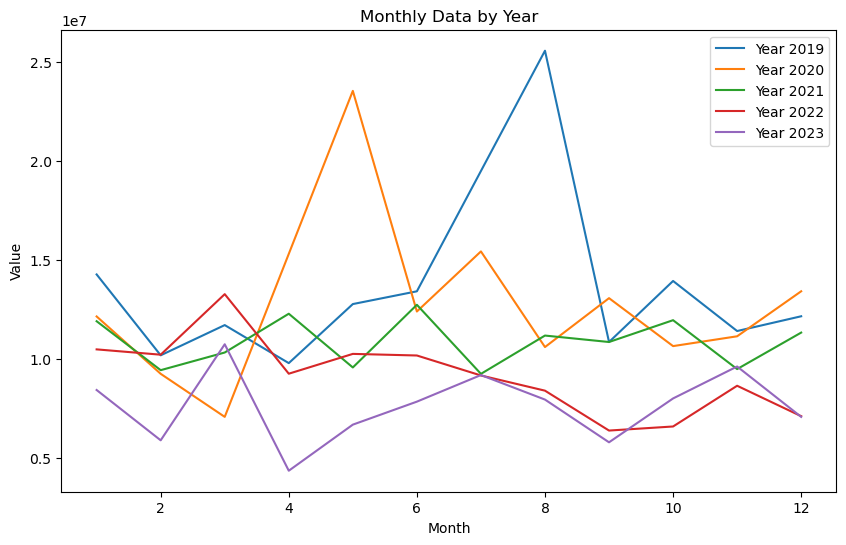

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths
file_paths = ["TradeData_10_26_2024_11_52_24.csv","TradeData_10_26_2024_11_52_40.csv","TradeData_10_26_2024_11_52_54.csv",
             "TradeData_10_26_2024_11_53_38.csv","TradeData_10_26_2024_11_54_2.csv"]

# Initialize an empty DataFrame to combine data from all CSVs
combined_df = pd.DataFrame()

# Loop through each file to load and combine data
for file in file_paths:
    df = pd.read_csv(file)
    
    # Convert 'refMonth' column to datetime format (assuming the column name is 'refMonth')
    df['refMonth'] = pd.to_datetime(df['refMonth'], format='%Y%m')
    
    # Append data to the combined DataFrame
    combined_df = pd.concat([combined_df, df])

# Extract year and month for plotting purposes
combined_df['Year'] = combined_df['refMonth'].dt.year
combined_df['Month'] = combined_df['refMonth'].dt.month

# Group by Year and Month, and calculate the required metric (e.g., sum, mean)
# Replace 'value_column' with the actual column name you want to analyze
monthly_data = combined_df.groupby(['Year', 'Month'])['fobvalue'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for year in monthly_data['Year'].unique():
    data = monthly_data[monthly_data['Year'] == year]
    plt.plot(data['Month'], data['fobvalue'], label=f"Year {year}")

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Data by Year')
plt.legend()
plt.show()


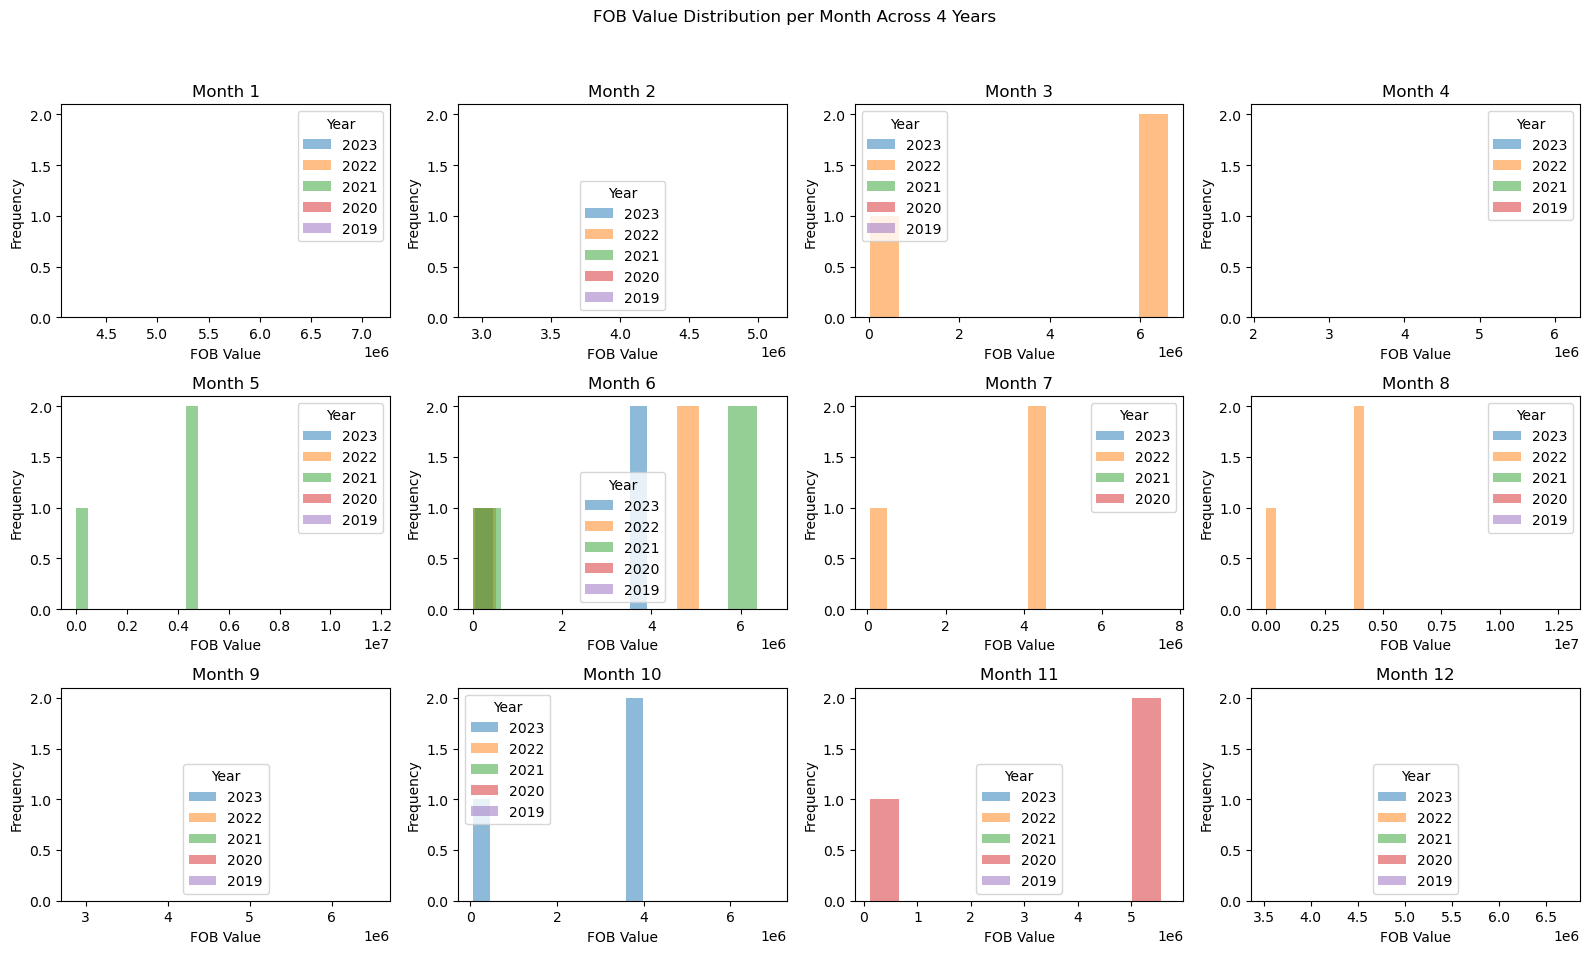

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths
file_paths = ["TradeData_10_26_2024_11_52_24.csv", "TradeData_10_26_2024_11_52_40.csv", 
              "TradeData_10_26_2024_11_52_54.csv", "TradeData_10_26_2024_11_53_38.csv", 
              "TradeData_10_26_2024_11_54_2.csv"]

# Initialize an empty DataFrame to combine data from all CSVs
combined_df = pd.DataFrame()

# Loop through each file to load and combine data
for file in file_paths:
    df = pd.read_csv(file)
    
    # Convert 'refMonth' column to datetime format (assuming the column name is 'refMonth')
    df['refMonth'] = pd.to_datetime(df['refMonth'], format='%Y%m')
    
    # Append data to the combined DataFrame
    combined_df = pd.concat([combined_df, df])

# Extract year and month for grouping purposes
combined_df['Year'] = combined_df['refMonth'].dt.year
combined_df['Month'] = combined_df['refMonth'].dt.month

# Set up a 3x4 grid of subplots for each month (12 subplots in total)
fig, axs = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle("FOB Value Distribution per Month Across 4 Years")

# Loop through each month (1 to 12) and create a histogram for each month
for month in range(1, 13):
    # Select the subplot for the current month
    ax = axs[(month-1) // 4, (month-1) % 4]
    
    # Filter data for the current month
    month_data = combined_df[combined_df['Month'] == month]
    
    # Plot a histogram for each year in this month’s subplot
    for year in month_data['Year'].unique():
        year_data = month_data[month_data['Year'] == year]
        ax.hist(year_data['fobvalue'], bins=10, alpha=0.5, label=f"{year}")
    
    # Customize each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel("FOB Value")
    ax.set_ylabel("Frequency")
    ax.legend(title="Year")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


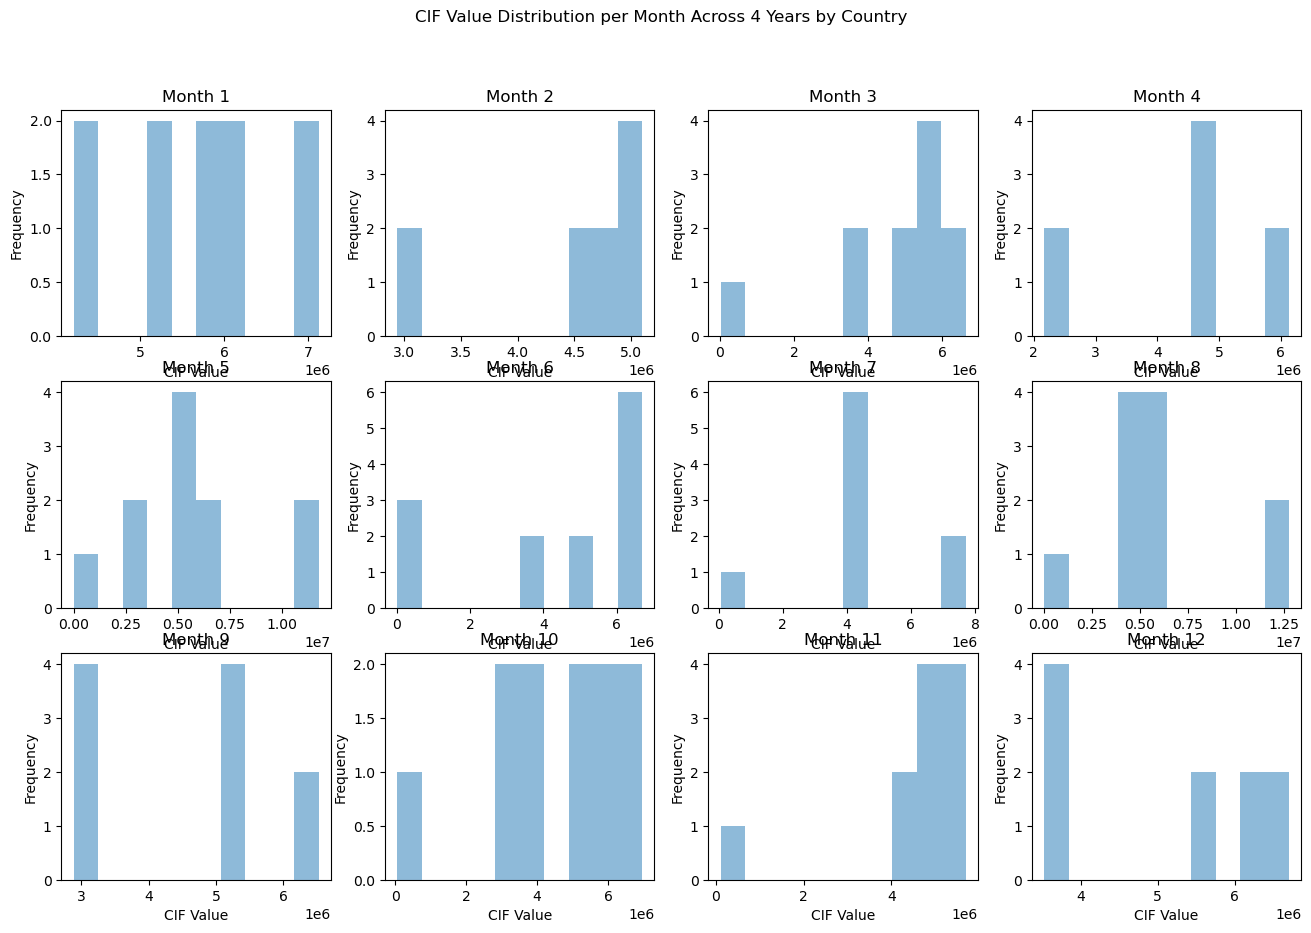

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths
file_paths = ["TradeData_10_26_2024_11_52_24.csv", "TradeData_10_26_2024_11_52_40.csv", 
              "TradeData_10_26_2024_11_52_54.csv", "TradeData_10_26_2024_11_53_38.csv", 
              "TradeData_10_26_2024_11_54_2.csv"]

# Initialize an empty DataFrame to combine data from all CSVs
combined_df = pd.DataFrame()

# Loop through each file to load and combine data
for file in file_paths:
    df = pd.read_csv(file)
    
    # Convert 'refMonth' column to datetime format
    df['refMonth'] = pd.to_datetime(df['refMonth'], format='%Y%m')
    
    # Append data to the combined DataFrame
    combined_df = pd.concat([combined_df, df])

# Extract year and month for grouping purposes
combined_df['Year'] = combined_df['refMonth'].dt.year
combined_df['Month'] = combined_df['refMonth'].dt.month

# Filter data for specified reporter codes only (e.g., 'ZMB' and 'sudan')
combined_df = combined_df[combined_df['reporterCode'].isin(['ZMB', 'sudan'])]

# Set up a 3x4 grid of subplots for each month (12 subplots in total)
fig, axs = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle("CIF Value Distribution per Month Across 4 Years by Country")

# Loop through each month (1 to 12) and create a histogram for each month
for month in range(1, 13):
    # Select the subplot for the current month
    ax = axs[(month-1) // 4, (month-1) % 4]
    
    # Filter data for the current month
    month_data = combined_df[combined_df['Month'] == month]
    
    # Plot a histogram for each country within this month’s subplot
    for country in month_data['reporterCode'].unique():
        country_data = month_data[month_data['reporterCode'] == country]
        ax.hist(country_data['cifvalue'], bins=10, alpha=0.5, label=f"{country}")
    
    # Customize each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel("CIF Value")
    ax.set_ylabel("Frequency")


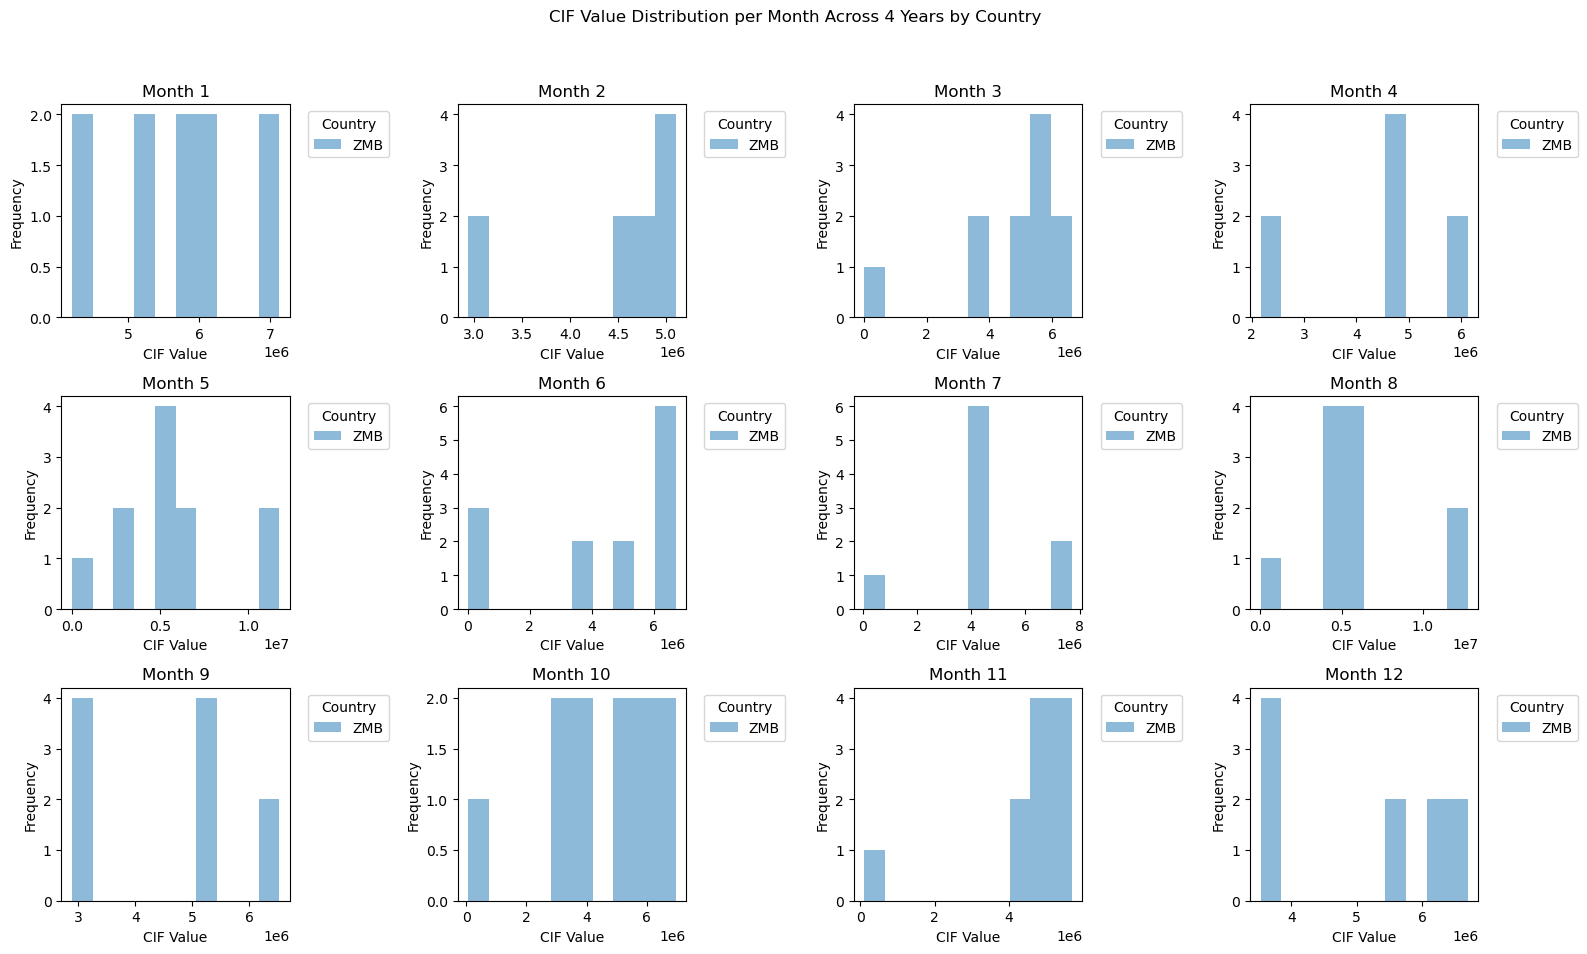

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths
file_paths = ["TradeData_10_26_2024_11_52_24.csv", "TradeData_10_26_2024_11_52_40.csv", 
              "TradeData_10_26_2024_11_52_54.csv", "TradeData_10_26_2024_11_53_38.csv", 
              "TradeData_10_26_2024_11_54_2.csv"]

# Initialize an empty DataFrame to combine data from all CSVs
combined_df = pd.DataFrame()

# Loop through each file to load and combine data
for file in file_paths:
    df = pd.read_csv(file)
    
    # Convert 'refMonth' column to datetime format
    df['refMonth'] = pd.to_datetime(df['refMonth'], format='%Y%m')
    
    # Append data to the combined DataFrame
    combined_df = pd.concat([combined_df, df])

# Extract year and month for grouping purposes
combined_df['Year'] = combined_df['refMonth'].dt.year
combined_df['Month'] = combined_df['refMonth'].dt.month

# Filter data for specified reporter codes only (e.g., 'ZMB' and 'sudan')
combined_df = combined_df[combined_df['reporterCode'].isin(['ZMB', 'sudan'])]

# Set up a 3x4 grid of subplots for each month (12 subplots in total)
fig, axs = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle("CIF Value Distribution per Month Across 4 Years by Country")

# Loop through each month (1 to 12) and create a histogram for each month
for month in range(1, 13):
    # Select the subplot for the current month
    ax = axs[(month-1) // 4, (month-1) % 4]
    
    # Filter data for the current month
    month_data = combined_df[combined_df['Month'] == month]
    
    # Plot a histogram for each country within this month’s subplot
    for country in month_data['reporterCode'].unique():
        country_data = month_data[month_data['reporterCode'] == country]
        ax.hist(country_data['cifvalue'], bins=10, alpha=0.5, label=f"{country}")
    
    # Customize each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel("CIF Value")
    ax.set_ylabel("Frequency")
    
    # Place the legend outside the plot on the right side
    ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


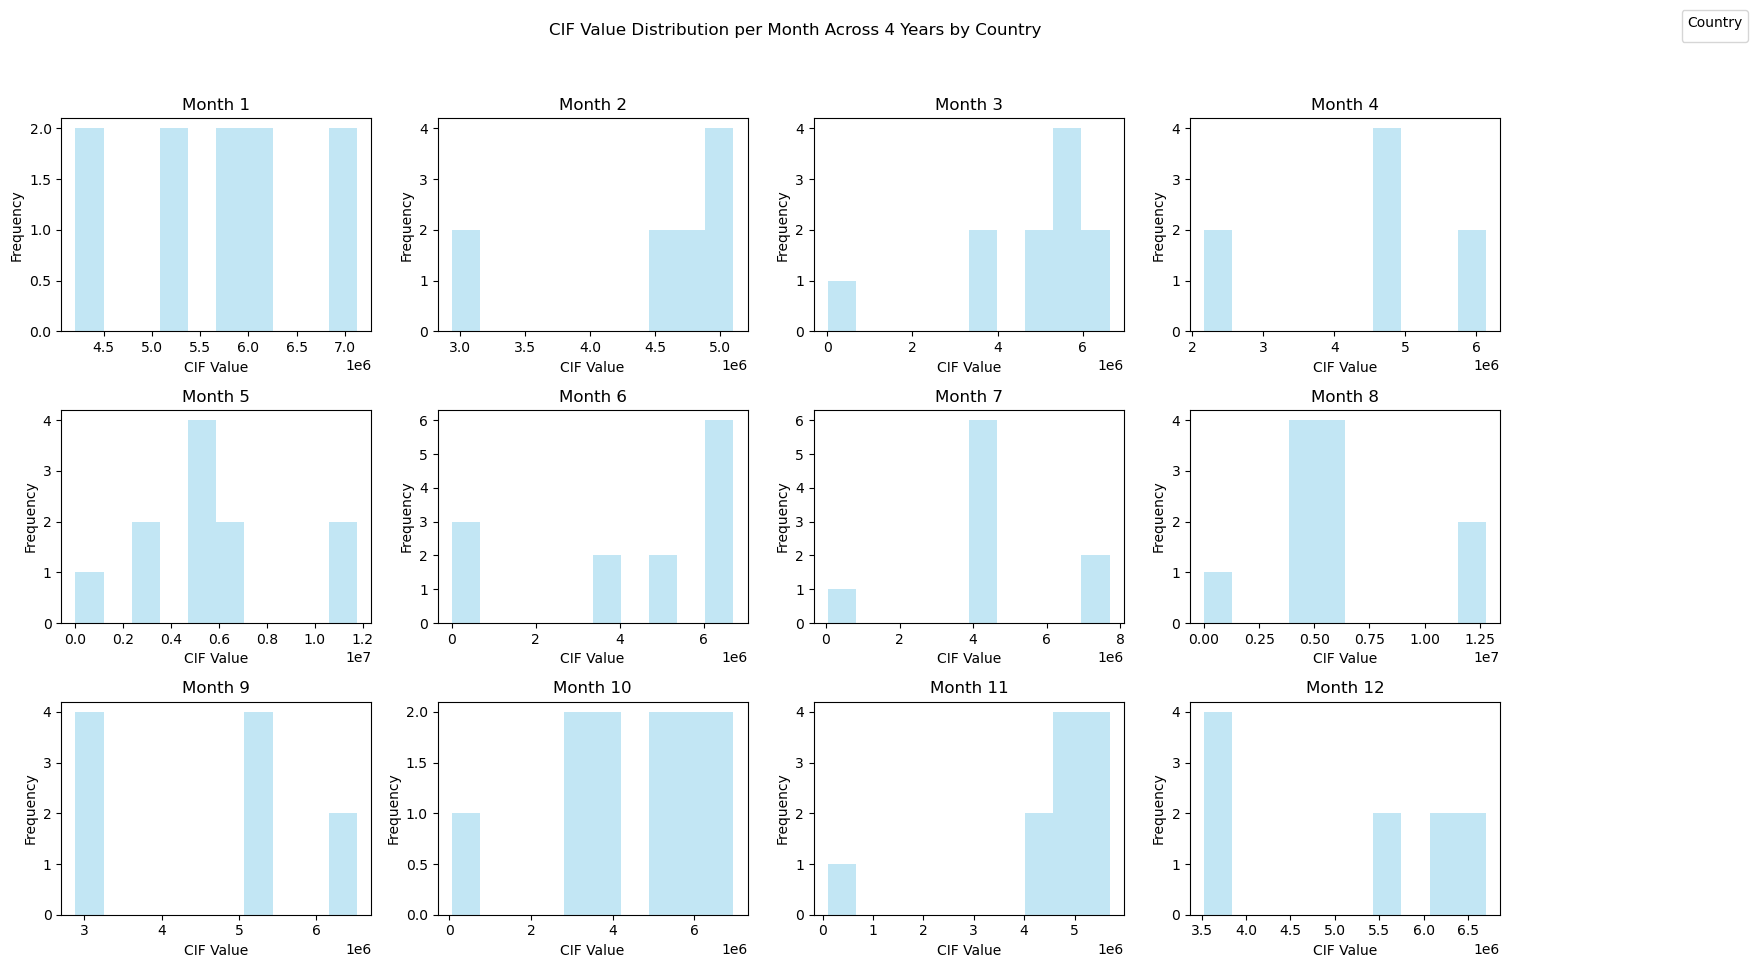

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths
file_paths = ["TradeData_10_26_2024_11_52_24.csv", "TradeData_10_26_2024_11_52_40.csv", 
              "TradeData_10_26_2024_11_52_54.csv", "TradeData_10_26_2024_11_53_38.csv", 
              "TradeData_10_26_2024_11_54_2.csv"]

# Initialize an empty DataFrame to combine data from all CSVs
combined_df = pd.DataFrame()

# Loop through each file to load and combine data
for file in file_paths:
    df = pd.read_csv(file)
    
    # Convert 'refMonth' column to datetime format
    df['refMonth'] = pd.to_datetime(df['refMonth'], format='%Y%m')
    
    # Append data to the combined DataFrame
    combined_df = pd.concat([combined_df, df])

# Extract year and month for grouping purposes
combined_df['Year'] = combined_df['refMonth'].dt.year
combined_df['Month'] = combined_df['refMonth'].dt.month

# Filter data for specified reporter codes only (e.g., 'ZMB' and 'sudan')
combined_df = combined_df[combined_df['reporterCode'].isin(['ZMB', 'sudan'])]

# Set up a 3x4 grid of subplots for each month (12 subplots in total)
fig, axs = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle("CIF Value Distribution per Month Across 4 Years by Country")

# Define colors for each country for consistent legend colors
colors = {'ZMB': 'skyblue', 'sudan': 'salmon'}

# Loop through each month (1 to 12) and create a histogram for each month
for month in range(1, 13):
    # Select the subplot for the current month
    ax = axs[(month-1) // 4, (month-1) % 4]
    
    # Filter data for the current month
    month_data = combined_df[combined_df['Month'] == month]
    
    # Plot a histogram for each country within this month’s subplot
    for country in month_data['reporterCode'].unique():
        country_data = month_data[month_data['reporterCode'] == country]
        ax.hist(country_data['cifvalue'], bins=10, alpha=0.5, color=colors[country], label=country if month == 1 else "_nolegend_")
    
    # Customize each subplot
    ax.set_title(f"Month {month}")
    ax.set_xlabel("CIF Value")
    ax.set_ylabel("Frequency")

# Add a global legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Country", loc="upper right", bbox_to_anchor=(1.1, 1))

plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])  # Adjust layout to fit title and legend
plt.show()


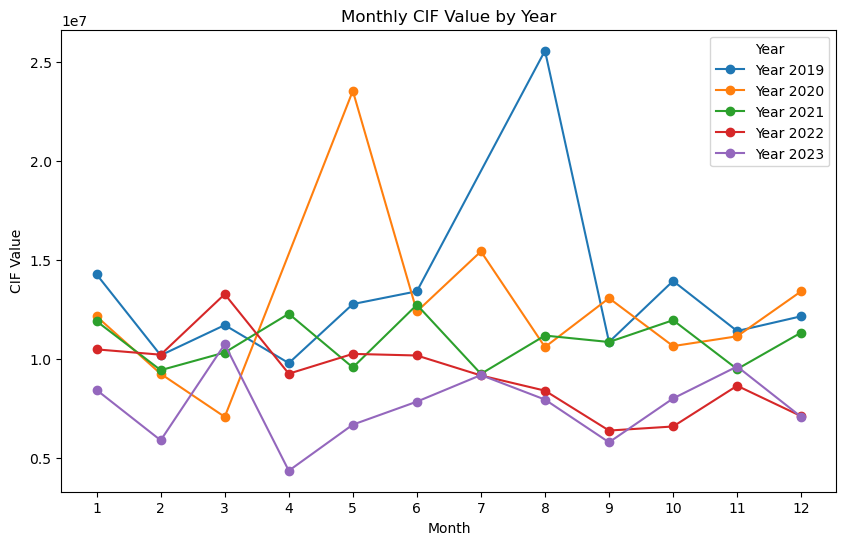

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV file paths
file_paths = ["TradeData_10_26_2024_11_52_24.csv", "TradeData_10_26_2024_11_52_40.csv", 
              "TradeData_10_26_2024_11_52_54.csv", "TradeData_10_26_2024_11_53_38.csv", 
              "TradeData_10_26_2024_11_54_2.csv"]

# Initialize an empty DataFrame to combine data from all CSVs
combined_df = pd.DataFrame()

# Loop through each file to load and combine data
for file in file_paths:
    df = pd.read_csv(file)
    
    # Convert 'refMonth' column to datetime format
    df['refMonth'] = pd.to_datetime(df['refMonth'], format='%Y%m')
    
    # Append data to the combined DataFrame
    combined_df = pd.concat([combined_df, df])

# Extract year and month for grouping purposes
combined_df['Year'] = combined_df['refMonth'].dt.year
combined_df['Month'] = combined_df['refMonth'].dt.month

# Group by Year and Month, and calculate the sum of 'cifvalue' for each group
# Replace 'cifvalue' with the actual column name you want to plot
monthly_data = combined_df.groupby(['Year', 'Month'])['cifvalue'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for year in monthly_data['Year'].unique():
    # Filter data for the current year
    data = monthly_data[monthly_data['Year'] == year]
    # Plot month vs cifvalue for the current year
    plt.plot(data['Month'], data['cifvalue'], marker='o', label=f"Year {year}")

# Customize the plot
plt.xlabel('Month')
plt.ylabel('CIF Value')
plt.title('Monthly CIF Value by Year')
plt.legend(title="Year")
plt.xticks(range(1, 13))  # Ensure x-axis has months from 1 to 12
plt.show()


In [59]:
import pandas as pd

# Load your DataFrame (assuming it’s already combined from multiple CSVs, e.g., `combined_df`)
# combined_df = pd.read_csv('your_combined_data.csv')  # Uncomment if loading from a single CSV file

# Get distinct values for each column
distinct_values = {col: combined_df[col].unique() for col in combined_df.columns}

# Print distinct values for each column
for col, values in distinct_values.items():
    print(f"Distinct values in column '{col}':")
    print(values)
    print("\n" + "-"*50 + "\n")


Distinct values in column 'typeCode':
['M']

--------------------------------------------------

Distinct values in column 'freqCode':
[20230101 20230201 20230301 20230401 20230501 20230601 20230701 20230801
 20230901 20231001 20231101 20231201 20220101 20220201 20220301 20220401
 20220501 20220601 20220701 20220801 20220901 20221001 20221101 20221201
 20210101 20210201 20210301 20210401 20210501 20210601 20210701 20210801
 20210901 20211001 20211101 20211201 20200101 20200201 20200301 20200501
 20200601 20200701 20200801 20200901 20201001 20201101 20201201 20190101
 20190201 20190301 20190401 20190501 20190601 20190801 20190901 20191001
 20191101 20191201]

--------------------------------------------------

Distinct values in column 'refPeriodId':
[2023 2022 2021 2020 2019]

--------------------------------------------------

Distinct values in column 'refYear':
[ 1  2  3  4  5  6  7  8  9 10 11 12]

--------------------------------------------------

Distinct values in column 'refMo

In [65]:
import pandas as pd
import altair as alt

# Read the CSV files into pandas DataFrames
df1 = pd.read_csv("TradeData_10_26_2024_11_54_2.csv")
df2 = pd.read_csv("TradeData_10_26_2024_11_53_38.csv")
df3 = pd.read_csv("TradeData_10_26_2024_11_52_54.csv")
df4 = pd.read_csv("TradeData_10_26_2024_11_52_40.csv")
df5 = pd.read_csv("TradeData_10_26_2024_11_52_24.csv")

# Concatenate all DataFrames into a single DataFrame `df_combined`
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Convert `refPeriodId` and `refMonth` to string data type and concatenate them to a single column `date` in format 'YYYY-MM'
df_combined['date'] = df_combined['refPeriodId'].astype(str) + '-' + df_combined['refMonth'].astype(str).str[4:]

# Convert `date` to datetime format
df_combined['date'] = pd.to_datetime(df_combined['date'], format='%Y-%m')

# Select only the `date` and `fobvalue` columns
df_combined = df_combined[['date', 'fobvalue']]

# Create a line chart with `date` on x-axis and `fobvalue` on y-axis
chart = (
    alt.Chart(df_combined)
    .mark_line()
    .encode(
        x=alt.X('date', axis=alt.Axis(format='%Y-%m')),
        y='fobvalue',
        tooltip=['date', 'fobvalue']
    )
    .properties(title='FOB Value over Time')
    .interactive()
)

# Display the chart
chart.display()

alt.Chart(...)

In [67]:
import pandas as pd
import altair as alt

# Read the CSV files into pandas DataFrames
df1 = pd.read_csv("TradeData_10_26_2024_11_54_2.csv")
df2 = pd.read_csv("TradeData_10_26_2024_11_53_38.csv")
df3 = pd.read_csv("TradeData_10_26_2024_11_52_54.csv")
df4 = pd.read_csv("TradeData_10_26_2024_11_52_40.csv")
df5 = pd.read_csv("TradeData_10_26_2024_11_52_24.csv")

# Concatenate all DataFrames into a single DataFrame `df_combined`
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Convert `refPeriodId` and `refMonth` to string data type and concatenate them to a single column `date` in format 'YYYY-MM'
df_combined['date'] = df_combined['refPeriodId'].astype(str) + '-' + df_combined['refMonth'].astype(str).str[4:]

# Convert `date` to datetime format
df_combined['date'] = pd.to_datetime(df_combined['date'], format='%Y-%m')

# Select only the `date` and `fobvalue` columns
df_combined = df_combined[['date', 'fobvalue']]

# Create a line chart with `date` on x-axis and `fobvalue` on y-axis
chart = (
    alt.Chart(df_combined)
    .mark_line()
    .encode(
        x=alt.X('date', axis=alt.Axis(format='%Y-%m')),
        y='fobvalue',
        tooltip=['date', 'fobvalue']
    )
    .properties(title='FOB Value over Time')
    .interactive()
)

# Set width and height of the chart
chart = chart.properties(
    width=1000,
    height=600
)

# Display the chart
chart.display()

alt.Chart(...)

In [71]:
import pandas as pd
import altair as alt

# Read the CSV files into pandas DataFrames
df1 = pd.read_csv("TradeData_10_26_2024_11_54_2.csv")
df2 = pd.read_csv("TradeData_10_26_2024_11_53_38.csv")
df3 = pd.read_csv("TradeData_10_26_2024_11_52_54.csv")
df4 = pd.read_csv("TradeData_10_26_2024_11_52_40.csv")
df5 = pd.read_csv("TradeData_10_26_2024_11_52_24.csv")

# Concatenate all DataFrames into a single DataFrame `df_combined`
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Convert `refPeriodId` and `refMonth` to string data type and concatenate them to a single column `date` in format 'YYYY-MM'
df_combined['date'] = df_combined['refPeriodId'].astype(str) + '-' + df_combined['refMonth'].astype(str).str[4:]

# Convert `date` to datetime format
df_combined['date'] = pd.to_datetime(df_combined['date'], format='%Y-%m')

# Select only the `date` and `cifvalue` columns
df_combined = df_combined[['date', 'cifvalue']]

# Create a line chart with `date` on x-axis and `cifvalue` on y-axis
chart = (
    alt.Chart(df_combined)
    .mark_line()
    .encode(
        x=alt.X('date', axis=alt.Axis(format='%Y-%m')),
        y='cifvalue',
        tooltip=['date', 'cifvalue']
    )
    .properties(title='CIF Value over Time')
    .interactive()
)

# Set width and height of the chart
chart = chart.properties(
    width=1000,
    height=600
)

# Display the chart
chart.display()

alt.Chart(...)

In [11]:
import pandas as pd
file_path_1 = "TradeData_10_26_2024_11_52_24.csv"

In [13]:
df1 = pd.read_csv(file_path_1)

In [15]:
df1

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
C,M,20230101,2023,1,202301,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,4207100.689,4207100.689,0,False,True,NaN
C,M,20230101,2023,1,202301,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,4207100.689,4207100.689,0,False,True,NaN
C,M,20230201,2023,2,202302,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,2935730.404,2935730.404,0,False,True,NaN
C,M,20230201,2023,2,202302,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,2935730.404,2935730.404,0,False,True,NaN
C,M,20230301,2023,3,202303,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,5363119.242,5363119.242,0,False,True,NaN
C,M,20230301,2023,3,202303,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,5363119.242,5363119.242,0,False,True,NaN
C,M,20230401,2023,4,202304,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,2167098.522,2167098.522,0,False,True,NaN
C,M,20230401,2023,4,202304,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,2167098.522,2167098.522,0,False,True,NaN
C,M,20230501,2023,5,202305,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,3331714.313,3331714.313,0,False,True,NaN
C,M,20230501,2023,5,202305,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,3331714.313,3331714.313,0,False,True,NaN


In [19]:
df1.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
C,M,20230101,2023,1,202301,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,4207100.689,4207100.689,0,False,True,NaN
C,M,20230101,2023,1,202301,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,4207100.689,4207100.689,0,False,True,NaN
C,M,20230201,2023,2,202302,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,2935730.404,2935730.404,0,False,True,NaN
C,M,20230201,2023,2,202302,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,2935730.404,2935730.404,0,False,True,NaN
C,M,20230301,2023,3,202303,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,5363119.242,5363119.242,0,False,True,NaN


In [21]:
df1.tail()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
C,M,20231001,2023,10,202310,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,3935930.140,3935930.140,0,False,True,NaN
C,M,20231101,2023,11,202311,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,4801223.803,4801223.803,0,False,True,NaN
C,M,20231101,2023,11,202311,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,4801223.803,4801223.803,0,False,True,NaN
C,M,20231201,2023,12,202312,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,3528064.267,3528064.267,0,False,True,NaN
C,M,20231201,2023,12,202312,894,ZMB,Zambia,X,Export,...,False,0,False,NaN,3528064.267,3528064.267,0,False,True,NaN


In [25]:
df1.shape

(26, 47)

In [27]:
print("Number of rows: ", df1.shape[0])
print("Number of columns: ", df1.shape[1])

Number of rows:  26
Number of columns:  47


In [33]:
#Get Information About Our Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, C to C
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  26 non-null     object 
 1   freqCode                  26 non-null     int64  
 2   refPeriodId               26 non-null     int64  
 3   refYear                   26 non-null     int64  
 4   refMonth                  26 non-null     int64  
 5   period                    26 non-null     int64  
 6   reporterCode              26 non-null     object 
 7   reporterISO               26 non-null     object 
 8   reporterDesc              26 non-null     object 
 9   flowCode                  26 non-null     object 
 10  flowDesc                  26 non-null     int64  
 11  partnerCode               26 non-null     object 
 12  partnerISO                26 non-null     object 
 13  partnerDesc               26 non-null     int64  
 14  partner2Code      

In [31]:
#check null value in data
df1.isnull().sum()

typeCode                     0
freqCode                     0
refPeriodId                  0
refYear                      0
refMonth                     0
period                       0
reporterCode                 0
reporterISO                  0
reporterDesc                 0
flowCode                     0
flowDesc                     0
partnerCode                  0
partnerISO                   0
partnerDesc                  0
partner2Code                 0
partner2ISO                  0
partner2Desc                 0
classificationCode           0
classificationSearchCode     0
isOriginalClassification     0
cmdCode                      0
cmdDesc                      0
aggrLevel                    0
isLeaf                       0
customsCode                  0
customsDesc                  0
mosCode                      0
motCode                      0
motDesc                      0
qtyUnitCode                 26
qtyUnitAbbr                  0
qty                          0
isQtyEst

In [35]:
#Check For Duplicate Data and Drop Them
data_dup = df1.duplicated().any()
print(data_dup)

# if output is True, there's some duplicates

False


In [37]:
#Get Overall Statistics About The Dataset
df1.describe()

,freqCode,refPeriodId,refYear,refMonth,period,flowDesc,partnerDesc,isOriginalClassification,cmdDesc,customsDesc,...,qtyUnitAbbr,isQtyEstimated,altQtyUnitAbbr,isAltQtyEstimated,isNetWgtEstimated,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,isAggregate
count,2.600000e+01,26.0,26.000000,26.000000,26.0,26.0,26.0,26.000000,26.000000,26.0,...,26.0,26.000000,2.600000e+01,24.000000,26.0,0.0,2.600000e+01,2.600000e+01,26.0,0.0
mean,2.023066e+07,2023.0,6.615385,202306.615385,894.0,0.0,0.0,386025.961538,5.076923,0.0,...,0.0,14.384615,2.694680e+06,62.142083,0.0,NaN,3.513585e+06,3.513585e+06,0.0,NaN
std,3.453426e+02,0.0,3.453426,3.453426,0.0,0.0,0.0,357757.269396,1.016782,0.0,...,0.0,3.137858,9.220264e+06,19.838690,0.0,NaN,1.319900e+06,1.319900e+06,0.0,NaN
min,2.023010e+07,2023.0,1.000000,202301.000000,894.0,0.0,0.0,7108.000000,4.000000,0.0,...,0.0,-1.000000,0.000000e+00,1.000000,0.0,NaN,5.640157e+04,5.640157e+04,0.0,NaN
25%,2.023040e+07,2023.0,4.000000,202304.000000,894.0,0.0,0.0,7108.000000,4.000000,0.0,...,0.0,15.000000,3.000000e+00,54.240000,0.0,NaN,2.935730e+06,2.935730e+06,0.0,NaN
50%,2.023065e+07,2023.0,6.500000,202306.500000,894.0,0.0,0.0,710811.500000,6.000000,0.0,...,0.0,15.000000,4.000000e+00,64.760000,0.0,NaN,3.884835e+06,3.884835e+06,0.0,NaN
75%,2.023098e+07,2023.0,9.750000,202309.750000,894.0,0.0,0.0,710813.000000,6.000000,0.0,...,0.0,15.000000,5.000000e+00,73.460000,0.0,NaN,4.207101e+06,4.207101e+06,0.0,NaN
max,2.023120e+07,2023.0,12.000000,202312.000000,894.0,0.0,0.0,710813.000000,6.000000,0.0,...,0.0,15.000000,3.400000e+07,94.530000,0.0,NaN,5.363119e+06,5.363119e+06,0.0,NaN


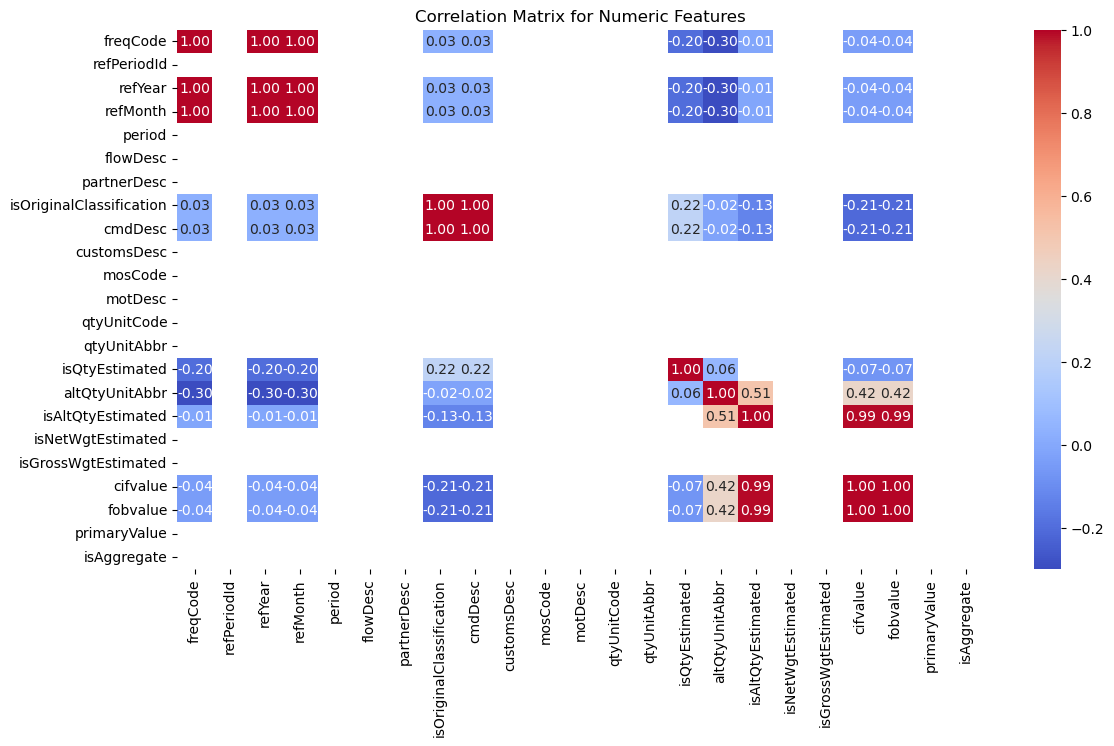

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Draw Correlation Matrix
# Select only numeric columns to avoid issues with non-numeric data
numeric_df = df1.select_dtypes(include=[np.number])

# Set the figure size for the heatmap
plt.figure(figsize=(13, 7))

# Draw a heatmap for the correlation matrix with annotations
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Display the plot
plt.title("Correlation Matrix for Numeric Features")
plt.show()
